In [2]:
import numpy as np
import pandas as pd
from os import path

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
SEED = 42
np.random.seed(SEED)

### Get data

In [4]:
DIR_DATA = 'data'

In [5]:
df_full = pd.read_csv(path.join(DIR_DATA, 'training_ratings_for_kaggle_comp.csv'),
                     usecols=['user', 'movie', 'rating'])
df_full.head()

,user,movie,rating
0,2783,1253,5
1,2783,589,5
2,2783,1270,4
3,2783,1274,4
4,2783,741,5


### Exploration Analysis

In [6]:
df_full.shape

(500100, 3)

In [7]:
df_full.isnull().sum()

user      0
movie     0
rating    0
dtype: int64

In [8]:
print(f'Number of unique users: {df_full.user.unique().shape[0]}')
print(f'Number of unique movies: {df_full.movie.unique().shape[0]}')

Number of unique users: 3255
Number of unique movies: 3551


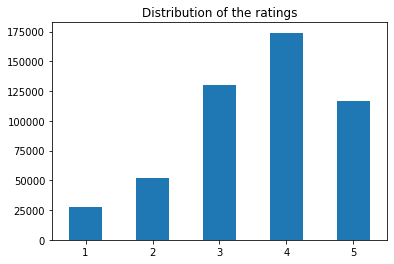

In [9]:
df_full.rating.value_counts(sort=False).plot.bar()
plt.title('Distribution of the ratings')
plt.xticks(rotation=0);

### By users

In [10]:
print(f'Mean number of rated movies per user: {int(df_full.groupby("user").movie.count().mean())}')
print(f'Min number of rated movies per user: {df_full.groupby("user").movie.count().min()}')
print(f'Max number of rated movies per user: {df_full.groupby("user").movie.count().max()}')

Mean number of rated movies per user: 153
Min number of rated movies per user: 2
Max number of rated movies per user: 1344


In [11]:
df_users = df_full.groupby('user').rating.mean().reset_index()

In [12]:
print(f'Number of the unique users: {df_users.shape[0]}')
print(f'The number of users who set a high average rating: {df_users[df_users.rating > 4].shape[0]}')
print(f'The number of users who set a min average rating: {df_users[df_users.rating < 3].shape[0]}')

Number of the unique users: 3255
The number of users who set a high average rating: 806
The number of users who set a min average rating: 191


### By movies

In [48]:
print(f'Mean number of ratings per movie: {int(df_full.groupby("movie").user.count().mean())}')
print(f'Min number of ratings per movie: {df_full.groupby("movie").user.count().min()}')
print(f'Max number of ratings per movie: {df_full.groupby("movie").user.count().max()}')

Mean number of ratings per movie: 140
Min number of ratings per movie: 1
Max number of ratings per movie: 1684


In [49]:
df_movies = df_full.groupby('movie').rating.mean().reset_index()

In [50]:
print(f'Number of the unique movies: {df_movies.shape[0]}')
print(f'The number of movies with high average rating: {df_movies[df_movies.rating > 4].shape[0]}')
print(f'The number of movies with high average rating: {df_movies[df_movies.rating < 3].shape[0]}')

Number of the unique movies: 3551
The number of movies with high average rating: 436
The number of movies with high average rating: 1047


In [51]:
print(f'The median of the rating: {df_movies.rating.median()}')

The median of the rating: 3.3754266211604094


#### Top movies

In [52]:
df_movies_data = pd.read_csv(path.join(DIR_DATA, 'movies.dat'), 
                             sep='::', 
                             names=['movie_id', 'title', 'type'],
                             engine='python')

df_movies_data.head(1)

,movie_id,title,type
0,1,Toy Story (1995),Animation|Children's|Comedy


In [53]:
df_movies_data[df_movies_data.movie_id.isin(df_movies[df_movies.rating == 5].movie.values)]

,movie_id,title,type
128,130,Angela (1995),Drama
777,787,"Gate of Heavenly Peace, The (1995)",Documentary
1057,1071,For the Moment (1994),Romance|War
1728,1787,Paralyzing Fear: The Story of Polio in America...,Documentary
1762,1830,Follow the Bitch (1998),Comedy
1832,1901,Dear Jesse (1997),Documentary
2128,2197,Firelight (1997),Drama
2263,2332,Belly (1998),Crime|Drama
2700,2769,"Yards, The (1999)",Crime|Mystery
2754,2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama


#### The worst movies

In [54]:
df_movies_data[df_movies_data.movie_id.isin(df_movies[df_movies.rating == 1].movie.values)]

,movie_id,title,type
125,127,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama
131,133,Nueba Yol (1995),Comedy|Drama
134,136,From the Journals of Jean Seberg (1995),Documentary
136,138,"Neon Bible, The (1995)",Drama
555,559,"Paris, France (1993)",Comedy
603,607,Century (1993),Drama
694,703,Boys (1996),Drama
734,744,Brothers in Trouble (1995),Drama
810,821,"Crude Oasis, The (1995)",Romance
832,843,Lotto Land (1995),Drama
